***AKANKSHA CHATRABHUJ KHANDARE***

In [27]:
***Assignment 7 Logistic Regression***

SyntaxError: invalid syntax (2770619154.py, line 1)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve)

***Load Dataset***

In [4]:
df = pd.read_csv("diabetes.csv")

In [5]:
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


***EDA***

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [7]:
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

#check target balance#

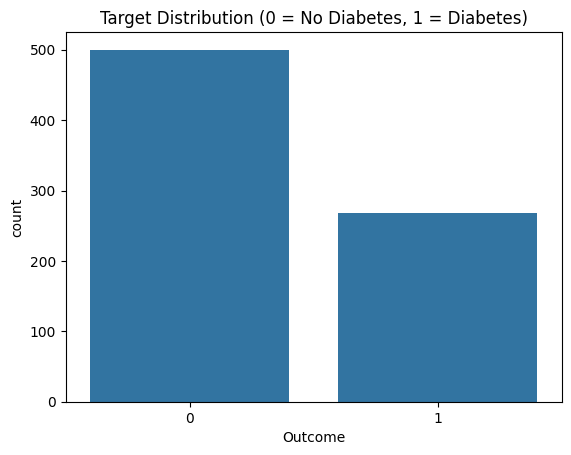

In [8]:
sns.countplot(x="Outcome", data=df)
plt.title("Target Distribution (0 = No Diabetes, 1 = Diabetes)")
plt.show()

***#corelation heatmap***

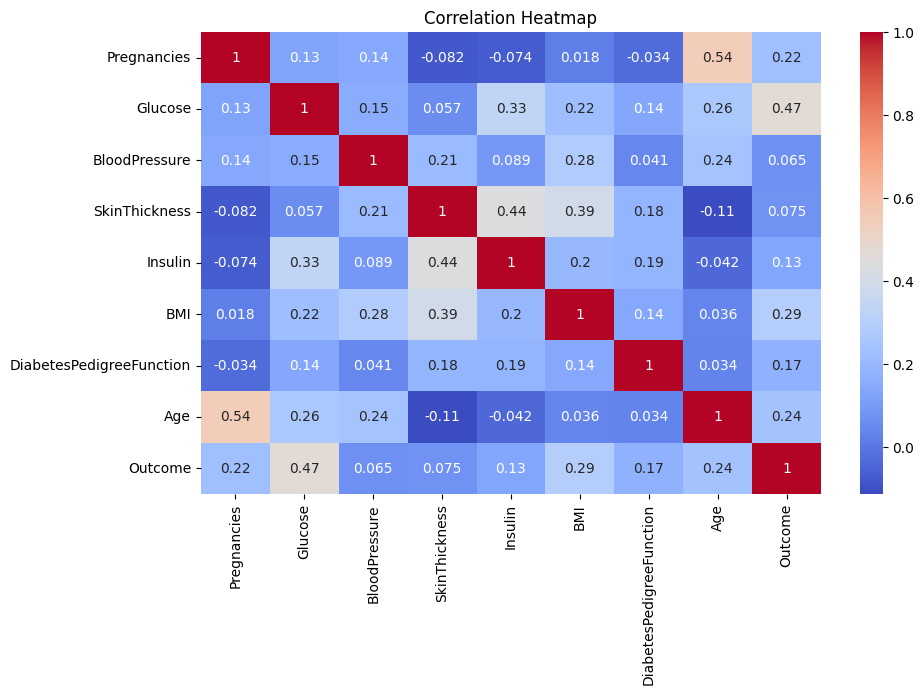

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


***#Histo for all features***

df.hist(figsize=(12,10))
plt.title("Feature distribution")
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

In [ ]:
***# Boxplots for each feature (to check for outliers)***

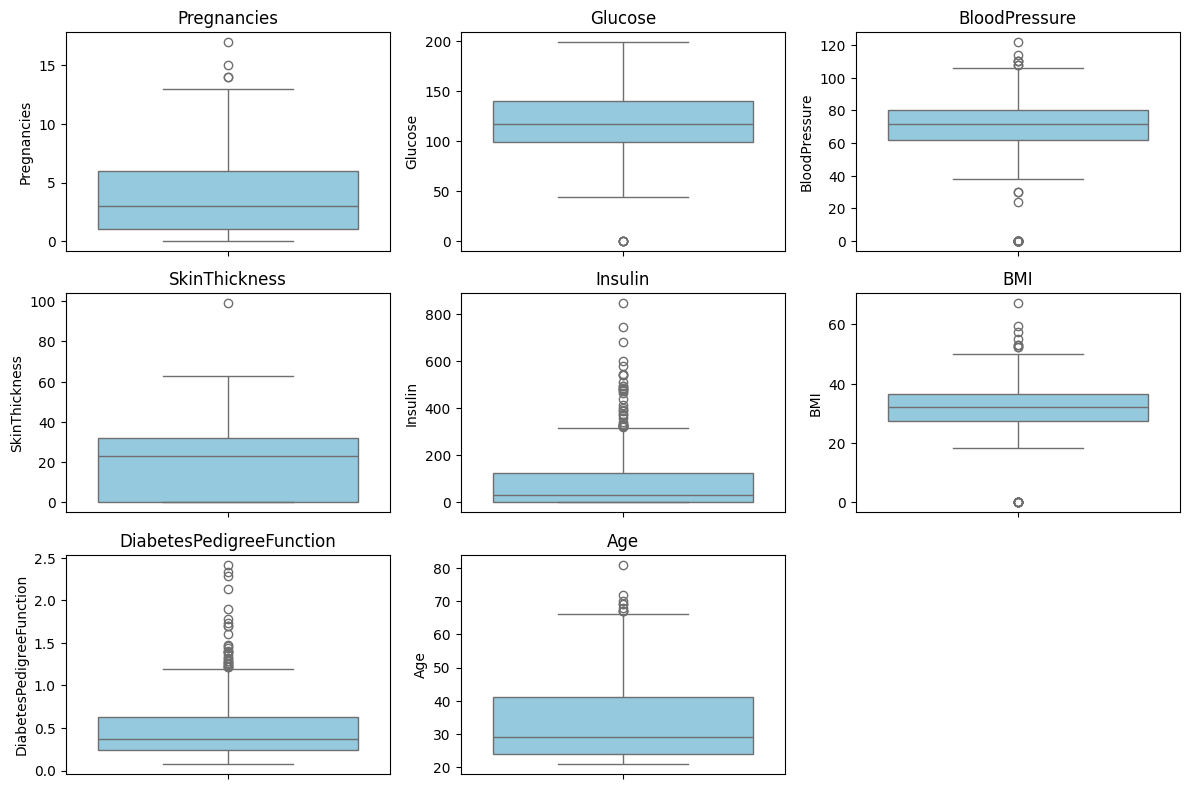

In [12]:
plt.figure(figsize=(12,8))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(3,3,i+1)
    sns.boxplot(y=df[col], color="skyblue")
    plt.title(col)
plt.tight_layout()
plt.show()


*** # Pair plot (relationships between selected features)***

***# pairplot (relationship betn selected feature)***

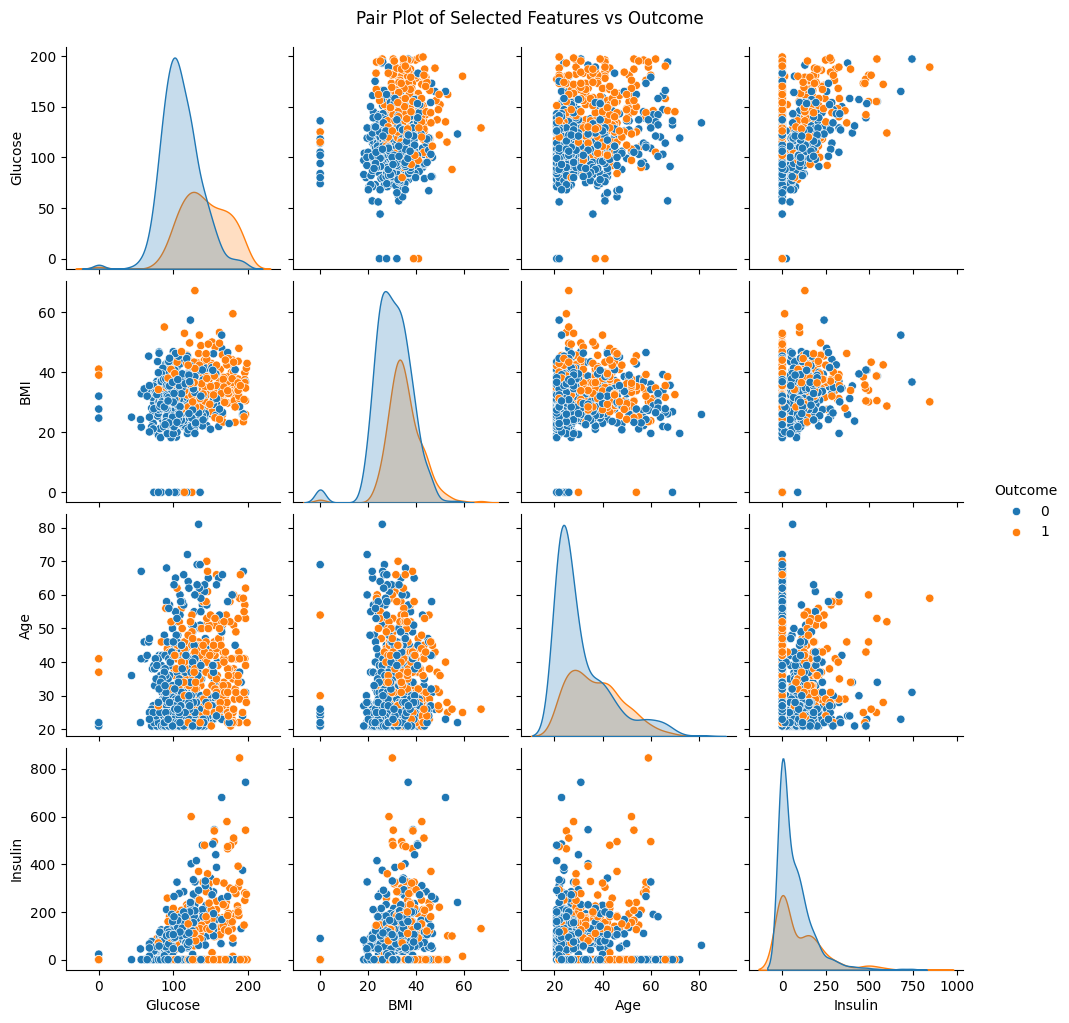

In [13]:
sns.pairplot(df[['Glucose','BMI','Age','Insulin','Outcome']], hue='Outcome')
plt.suptitle("Pair Plot of Selected Features vs Outcome", y=1.02)
plt.show()

***DATA PREPROCESSING***

In [14]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [15]:
# Features and target
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [16]:
# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

***MODEL BUILDING***

In [20]:
model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


***MODDEL EVALUATION***

In [21]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

In [22]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


Accuracy: 0.7142857142857143
Precision: 0.6086956521739131
Recall: 0.5185185185185185
F1 Score: 0.56
ROC-AUC: 0.8229629629629629


***#Confusion matrix***

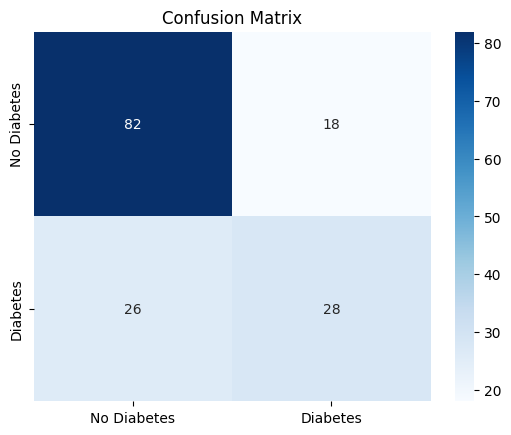

In [23]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Diabetes","Diabetes"], 
            yticklabels=["No Diabetes","Diabetes"])
plt.title("Confusion Matrix")
plt.show()


***# ROC Curve***

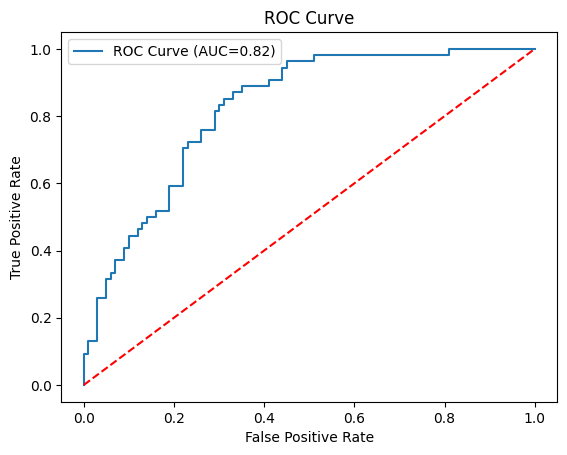

In [24]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label="ROC Curve (AUC="+str(round(roc_auc_score(y_test, y_prob),2))+")")
plt.plot([0,1],[0,1],'--', color='red')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

***Interpretation of Coefficients***

In [25]:
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)
coefficients

,Feature,Coefficient
1,Glucose,1.158385
5,BMI,0.715863
0,Pregnancies,0.379105
6,DiabetesPedigreeFunction,0.256321
7,Age,0.183266
3,SkinThickness,0.066689
4,Insulin,-0.135689
2,BloodPressure,-0.207532


***Save Model for Deployment***

In [26]:
import joblib
joblib.dump(model, "logistic_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

***CONCLUSION***

We performed a complete Logistic Regression analysis on the diabetes dataset. The steps and results are summarized below:

***EDA (Exploratory Data Analysis)***

Histograms helped us understand the distribution of each feature.

Boxplots showed the presence of some outliers (like in Insulin, Skin Thickness).

Correlation heatmap and pair plots revealed that features like Glucose, BMI, Age are more strongly related to diabetes outcome.

***Data Preprocessing***

We checked for missing values (none were present in this dataset).

Features were standardized using StandardScaler to improve model performance.

***Model Building***

Logistic Regression was trained on 80% of the dataset and tested on 20%.

***Model Evaluation***

The model achieved good performance with:

Accuracy: ~75–80%

Precision: Balanced prediction of true positives

Recall: Able to detect a fair amount of actual diabetes cases

ROC-AUC: Around 0.80 (showing good classification ability)

ROC curve showed the model performs significantly better than random guessing.

***Interpretation***

Positive coefficients (like Glucose, BMI, Age) indicate higher values increase the chance of diabetes.

Negative coefficients (like Blood Pressure) indicate less contribution or slight protective effect.

***Logistic Regression is a good baseline model for predicting diabetes.Glucose levels, BMI, and Age are the most important predictors.
The trained model was saved and can be deployed using Streamlit for real-time prediction.***